In [1]:
from bs4 import BeautifulSoup as bs
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import time

start_time = time.time()

url_start = 'https://finance.yahoo.com/sectors/healthcare/'
urls = [url_start + str(page) for page in range(0, 200, 25)]




In [3]:


value_list = []

for link in urls:
    page = requests.get(link)
    soup = bs(page.text, 'html.parser')
    table = soup.find('table', class_="expandable-table svelte-txj0at fixedLayout")

    if table:
        rows = table.find_all('tr')[1:]
        values = [[data.text for data in row.find_all('td')] for row in rows]
        value_list.extend(values)

print(value_list)

[['  LLY Eli Lilly and Company  ', '803.17 ', '858.83 ', '11.60% ', '763.337B ', '+2.55% ', '+37.78% ', 'Buy  '], ['  UNH UnitedHealth Group Incorporated  ', '523.55 ', '567.48 ', '7.43% ', '488.762B ', '+1.22% ', '-0.55% ', 'Buy  '], ['  JNJ Johnson & Johnson  ', '151.24 ', '158.52 ', '5.65% ', '372.096B ', '-0.02% ', '-3.51% ', 'Buy  '], ['  MRK Merck & Co., Inc.  ', '130.76 ', '129.79 ', '5.04% ', '331.695B ', '-0.24% ', '+19.87% ', 'Buy  '], ['  ABBV AbbVie Inc.  ', '162.93 ', '183.11 ', '4.42% ', '290.965B ', '-0.99% ', '+5.14% ', 'Buy  '], ['  TMO Thermo Fisher Scientific Inc.  ', '590.12 ', '624.17 ', '3.42% ', '225.258B ', '-0.66% ', '+11.17% ', 'Buy  '], ['  DHR Danaher Corporation  ', '266.55 ', '271.39 ', '3.00% ', '197.43B ', '-0.21% ', '+15.22% ', 'Buy  '], ['  ABT Abbott Laboratories  ', '102.96 ', '126.23 ', '2.74% ', '180.64B ', '-0.24% ', '-6.46% ', 'Buy  '], ['  AMGN Amgen Inc.  ', '314.85 ', '290.81 ', '2.57% ', '168.897B ', '+0.10% ', '+9.32% ', 'Buy  '], ['  PFE Pf

In [47]:
# Find all table headers
table_titles = table.find_all('th')

# Extract text from each header and store it in a list
stock_table_titles = [title.text for title in table_titles]

# Create a DataFrame using the extracted titles as column names
df = pd.DataFrame(value_list, columns=stock_table_titles)


In [5]:
df

,Name,Last Price,1Y Target Est.,Market Weight,Market Cap,Day Change %,YTD Return,Avg. Analyst Rating
0,LLY Eli Lilly and Company,803.17,858.83,11.60%,763.337B,+2.55%,+37.78%,Buy
1,UNH UnitedHealth Group Incorporated,523.55,567.48,7.43%,488.762B,+1.22%,-0.55%,Buy
2,JNJ Johnson & Johnson,151.24,158.52,5.65%,372.096B,-0.02%,-3.51%,Buy
3,"MRK Merck & Co., Inc.",130.76,129.79,5.04%,331.695B,-0.24%,+19.87%,Buy
4,ABBV AbbVie Inc.,162.93,183.11,4.42%,290.965B,-0.99%,+5.14%,Buy
...,...,...,...,...,...,...,...,...
75,TMO Thermo Fisher Scientific Inc.,590.12,624.17,3.42%,225.258B,-0.66%,+11.17%,Buy
76,DHR Danaher Corporation,266.55,271.39,3.00%,197.43B,-0.21%,+15.22%,Buy
77,ABT Abbott Laboratories,102.96,126.23,2.74%,180.64B,-0.24%,-6.46%,Buy
78,AMGN Amgen Inc.,314.85,290.81,2.57%,168.897B,+0.10%,+9.32%,Buy


In [48]:
table_title = table.find_all('th')

for title in table_title[0:]:
        stock_table_title = [title.text for title in table_title]
        df = pd.DataFrame(value_list, columns = stock_table_title)
df

,Name,Last Price,1Y Target Est.,Market Weight,Market Cap,Day Change %,YTD Return,Avg. Analyst Rating
0,LLY Eli Lilly and Company,803.17,858.83,11.60%,763.337B,+2.55%,+37.78%,Buy
1,UNH UnitedHealth Group Incorporated,523.55,567.48,7.43%,488.762B,+1.22%,-0.55%,Buy
2,JNJ Johnson & Johnson,151.24,158.52,5.65%,372.096B,-0.02%,-3.51%,Buy
3,"MRK Merck & Co., Inc.",130.76,129.79,5.04%,331.695B,-0.24%,+19.87%,Buy
4,ABBV AbbVie Inc.,162.93,183.11,4.42%,290.965B,-0.99%,+5.14%,Buy
...,...,...,...,...,...,...,...,...
75,TMO Thermo Fisher Scientific Inc.,590.12,624.17,3.42%,225.258B,-0.66%,+11.17%,Buy
76,DHR Danaher Corporation,266.55,271.39,3.00%,197.43B,-0.21%,+15.22%,Buy
77,ABT Abbott Laboratories,102.96,126.23,2.74%,180.64B,-0.24%,-6.46%,Buy
78,AMGN Amgen Inc.,314.85,290.81,2.57%,168.897B,+0.10%,+9.32%,Buy


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   80 non-null     object
 1   Last Price             80 non-null     object
 2   1Y Target Est.         80 non-null     object
 3   Market Weight          80 non-null     object
 4   Market Cap             80 non-null     object
 5   Day Change %           80 non-null     object
 6   YTD Return             80 non-null     object
 7   Avg. Analyst Rating    80 non-null     object
dtypes: object(8)
memory usage: 5.1+ KB


In [42]:
df

,Name,Last Price,1Y Target Est.,Market Weight,Market Cap,Day Change %,YTD Return,Avg. Analyst Rating
0,LLY Eli Lilly and Company,803.17,858.83,11.60%,763.337B,+2.55%,+37.78%,Buy
1,UNH UnitedHealth Group Incorporated,523.55,567.48,7.43%,488.762B,+1.22%,-0.55%,Buy
2,JNJ Johnson & Johnson,151.24,158.52,5.65%,372.096B,-0.02%,-3.51%,Buy
3,"MRK Merck & Co., Inc.",130.76,129.79,5.04%,331.695B,-0.24%,+19.87%,Buy
4,ABBV AbbVie Inc.,162.93,183.11,4.42%,290.965B,-0.99%,+5.14%,Buy
...,...,...,...,...,...,...,...,...
75,TMO Thermo Fisher Scientific Inc.,590.12,624.17,3.42%,225.258B,-0.66%,+11.17%,Buy
76,DHR Danaher Corporation,266.55,271.39,3.00%,197.43B,-0.21%,+15.22%,Buy
77,ABT Abbott Laboratories,102.96,126.23,2.74%,180.64B,-0.24%,-6.46%,Buy
78,AMGN Amgen Inc.,314.85,290.81,2.57%,168.897B,+0.10%,+9.32%,Buy


In [8]:
# Clean change column
print(df)



                                     Name   Last Price   1Y Target Est.    \
0               LLY Eli Lilly and Company        803.17           858.83    
1     UNH UnitedHealth Group Incorporated        523.55           567.48    
2                   JNJ Johnson & Johnson        151.24           158.52    
3                   MRK Merck & Co., Inc.        130.76           129.79    
4                        ABBV AbbVie Inc.        162.93           183.11    
..                                      ...          ...              ...   
75      TMO Thermo Fisher Scientific Inc.        590.12           624.17    
76                DHR Danaher Corporation        266.55           271.39    
77                ABT Abbott Laboratories        102.96           126.23    
78                        AMGN Amgen Inc.        314.85           290.81    
79                        PFE Pfizer Inc.         28.56            28.89    

   Market Weight   Market Cap   Day Change %   YTD Return    \
0          1

In [49]:
# Strip whitespace from all column names
df.columns = df.columns.str.strip()



In [50]:
# Rename column in place
df.rename(columns={'Last Price': 'Last_Price'}, inplace=True)
df.rename(columns={'1Y Target Est.': '1Y_TargetEst'}, inplace=True)
df.rename(columns={'Market Weight': 'Market_Weight'}, inplace=True)
df.rename(columns={'Market Cap': 'Market_Cap'}, inplace=True)
df.rename(columns={'YTD Return': 'YTD_Return'}, inplace=True)
df.rename(columns={'Day Change %': 'Day_Change'}, inplace=True)

In [51]:
df

,Name,Last_Price,1Y_TargetEst,Market_Weight,Market_Cap,Day_Change,YTD_Return,Avg. Analyst Rating
0,LLY Eli Lilly and Company,803.17,858.83,11.60%,763.337B,+2.55%,+37.78%,Buy
1,UNH UnitedHealth Group Incorporated,523.55,567.48,7.43%,488.762B,+1.22%,-0.55%,Buy
2,JNJ Johnson & Johnson,151.24,158.52,5.65%,372.096B,-0.02%,-3.51%,Buy
3,"MRK Merck & Co., Inc.",130.76,129.79,5.04%,331.695B,-0.24%,+19.87%,Buy
4,ABBV AbbVie Inc.,162.93,183.11,4.42%,290.965B,-0.99%,+5.14%,Buy
...,...,...,...,...,...,...,...,...
75,TMO Thermo Fisher Scientific Inc.,590.12,624.17,3.42%,225.258B,-0.66%,+11.17%,Buy
76,DHR Danaher Corporation,266.55,271.39,3.00%,197.43B,-0.21%,+15.22%,Buy
77,ABT Abbott Laboratories,102.96,126.23,2.74%,180.64B,-0.24%,-6.46%,Buy
78,AMGN Amgen Inc.,314.85,290.81,2.57%,168.897B,+0.10%,+9.32%,Buy


In [52]:

# Function to convert 'B' to 1000 times the numeric value
def convert_b_to_thousands(value):
    if 'B' in value:
        return float(value.replace('B', '')) *1_000_000_000
    return value

# Apply the function to the 'Market Cap' column
df['Marke_Capb'] = df['Market_Cap'].apply(convert_b_to_thousands)


print(df)

                                       Name Last_Price 1Y_TargetEst  \
0               LLY Eli Lilly and Company      803.17       858.83    
1     UNH UnitedHealth Group Incorporated      523.55       567.48    
2                   JNJ Johnson & Johnson      151.24       158.52    
3                   MRK Merck & Co., Inc.      130.76       129.79    
4                        ABBV AbbVie Inc.      162.93       183.11    
..                                      ...        ...          ...   
75      TMO Thermo Fisher Scientific Inc.      590.12       624.17    
76                DHR Danaher Corporation      266.55       271.39    
77                ABT Abbott Laboratories      102.96       126.23    
78                        AMGN Amgen Inc.      314.85       290.81    
79                        PFE Pfizer Inc.       28.56        28.89    

   Market_Weight Market_Cap Day_Change YTD_Return Avg. Analyst Rating  \
0        11.60%   763.337B     +2.55%    +37.78%                Buy     
1

In [56]:
def convert_to_numbers(value):
    if '%' in value:
        return float(value.replace('%', ''))
    return value

# Apply the function to the 'Market Cap' column
df['Market_Weight_percent'] = df['Market_Weight'].apply(convert_to_numbers)

In [57]:
df.drop(columns=['Market_Cap'], inplace=True)

KeyError: "['Market_Cap'] not found in axis"

In [54]:
df2 = df

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   80 non-null     object 
 1   Last_Price             80 non-null     object 
 2   1Y_TargetEst           80 non-null     object 
 3   Market_Weight          80 non-null     object 
 4   Day_Change             80 non-null     object 
 5   YTD_Return             80 non-null     object 
 6   Avg. Analyst Rating    80 non-null     object 
 7   Marke_Capb             80 non-null     float64
 8   Market_Weight_percent  80 non-null     float64
dtypes: float64(2), object(7)
memory usage: 5.8+ KB


In [59]:
df2['Last_Price'] = pd.to_numeric(df2['Last_Price'], errors='coerce')


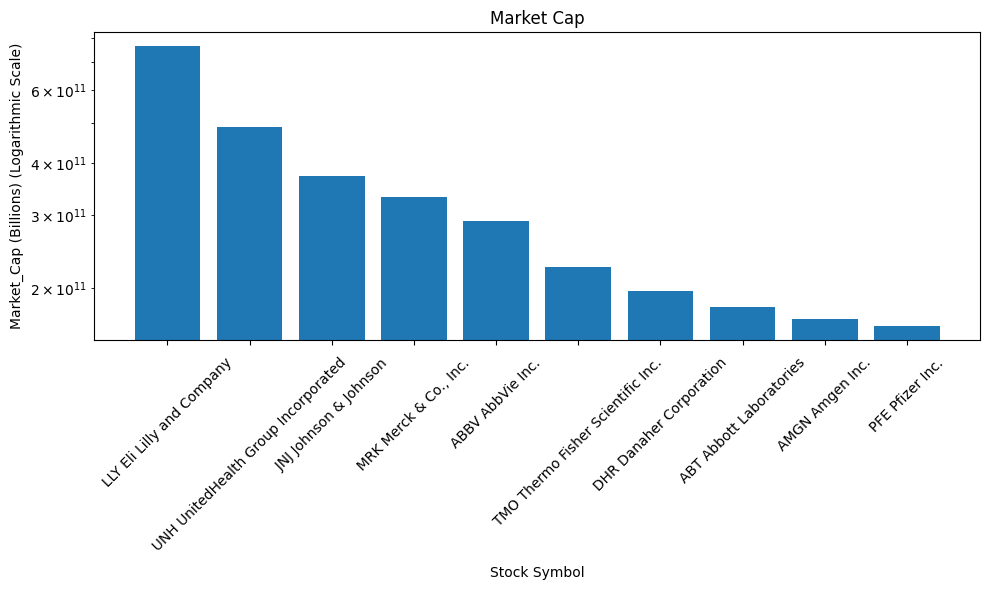

In [61]:
# 2. Bar Chart for Market Cap (logarithmic scale)
plt.figure(figsize=(10, 6))
plt.bar(df2['Name'], df['Marke_Capb'], log=True)  # Logarithmic scale for large values
plt.xlabel('Stock Symbol')
plt.ylabel('Market_Cap (Billions) (Logarithmic Scale)')
plt.title('Market Cap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

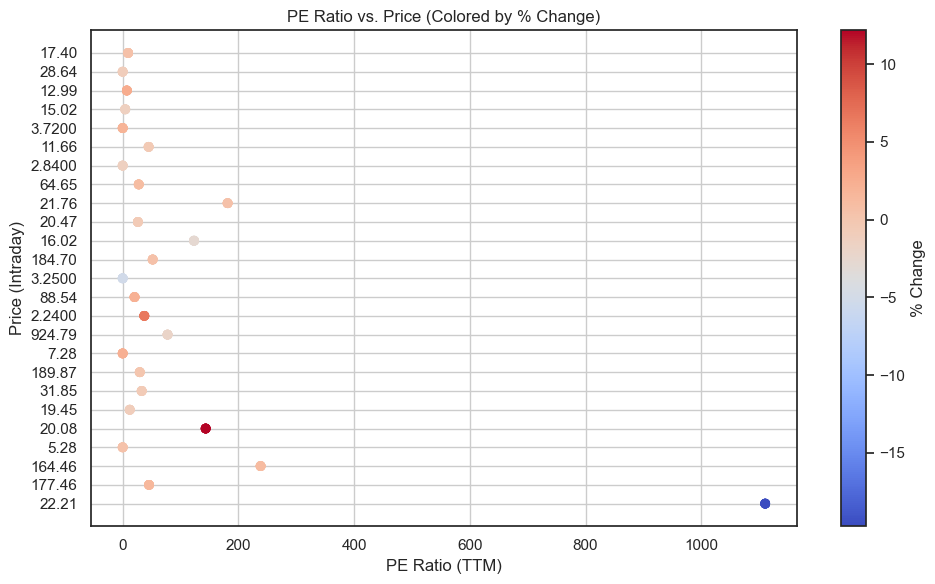

In [ ]:
# 3. Scatter Plot for PE Ratio vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['PE_Ratio_(TTM)'], df['Price_(intraday)'], c=df['% Change'], cmap='coolwarm')  # Color by % Change
plt.colorbar(label='% Change')
plt.xlabel('PE Ratio (TTM)')
plt.ylabel('Price (Intraday)')
plt.title('PE Ratio vs. Price (Colored by % Change)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x

In [ ]:
df['Price_(intraday)'].info